## Data Preprocessing

In [4]:
import pandas as pd
# Load the dataset to examine its structure and contents
file_path = 'Annual GDP.csv'
gdp_data = pd.read_csv(file_path)

# Display the first few rows and general info about the dataset
gdp_data.head(), gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              24 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  24 non-null     object 
 2   Annual GDP growth (%)             24 non-null     float64
 3   Real GDP prices (Ksh Million)     24 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 900.0+ bytes


(   Year Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
 0  2023                       15,108,806                    5.6   
 1  2022                       13,489,642                    4.9   
 2  2021                       12,027,662                    7.6   
 3  2020                       10,715,070                   -0.3   
 4  2019                       10,237,727                    5.1   
 
   Real GDP prices (Ksh Million)  
 0                    10,399,980  
 1                     9,852,583  
 2                     9,395,942  
 3                     8,733,060  
 4                     8,756,946  ,
 None)

In [6]:
# Remove commas and convert the GDP columns to numeric types
gdp_data['Nominal GDP prices (Ksh Million)'] = gdp_data['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
gdp_data['Real GDP prices (Ksh Million)'] = gdp_data['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Confirm changes by displaying the updated data types and first few rows
gdp_data.head(), gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              24 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  24 non-null     float64
 2   Annual GDP growth (%)             24 non-null     float64
 3   Real GDP prices (Ksh Million)     24 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 900.0 bytes


(   Year  Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
 0  2023                        15108806.0                    5.6   
 1  2022                        13489642.0                    4.9   
 2  2021                        12027662.0                    7.6   
 3  2020                        10715070.0                   -0.3   
 4  2019                        10237727.0                    5.1   
 
    Real GDP prices (Ksh Million)  
 0                     10399980.0  
 1                      9852583.0  
 2                      9395942.0  
 3                      8733060.0  
 4                      8756946.0  ,
 None)

## visualizing trends in GDP over time

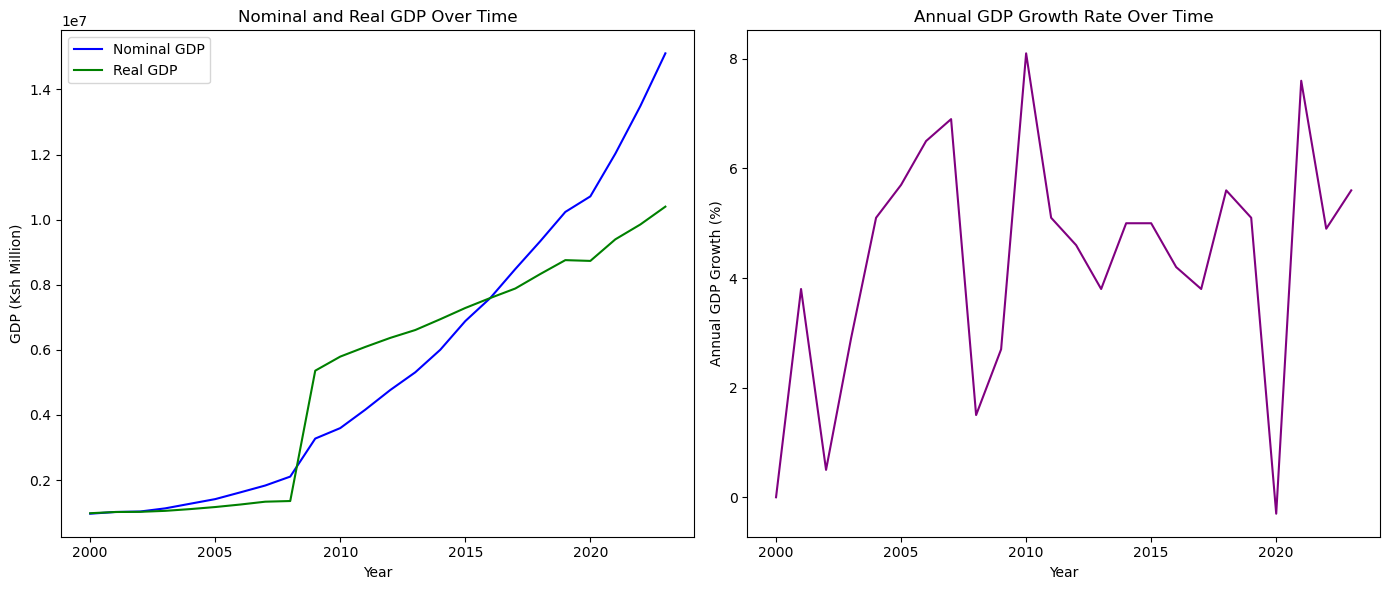

In [9]:
import matplotlib.pyplot as plt

# Set up the figure and axes for multiple plots
plt.figure(figsize=(14, 6))

# Plot Nominal and Real GDP over time
plt.subplot(1, 2, 1)
plt.plot(gdp_data['Year'], gdp_data['Nominal GDP prices (Ksh Million)'], label="Nominal GDP", color="blue")
plt.plot(gdp_data['Year'], gdp_data['Real GDP prices (Ksh Million)'], label="Real GDP", color="green")
plt.xlabel("Year")
plt.ylabel("GDP (Ksh Million)")
plt.title("Nominal and Real GDP Over Time")
plt.legend()

# Plot Annual GDP growth rate over time
plt.subplot(1, 2, 2)
plt.plot(gdp_data['Year'], gdp_data['Annual GDP growth (%)'], color="purple")
plt.xlabel("Year")
plt.ylabel("Annual GDP Growth (%)")
plt.title("Annual GDP Growth Rate Over Time")

plt.tight_layout()
plt.show()

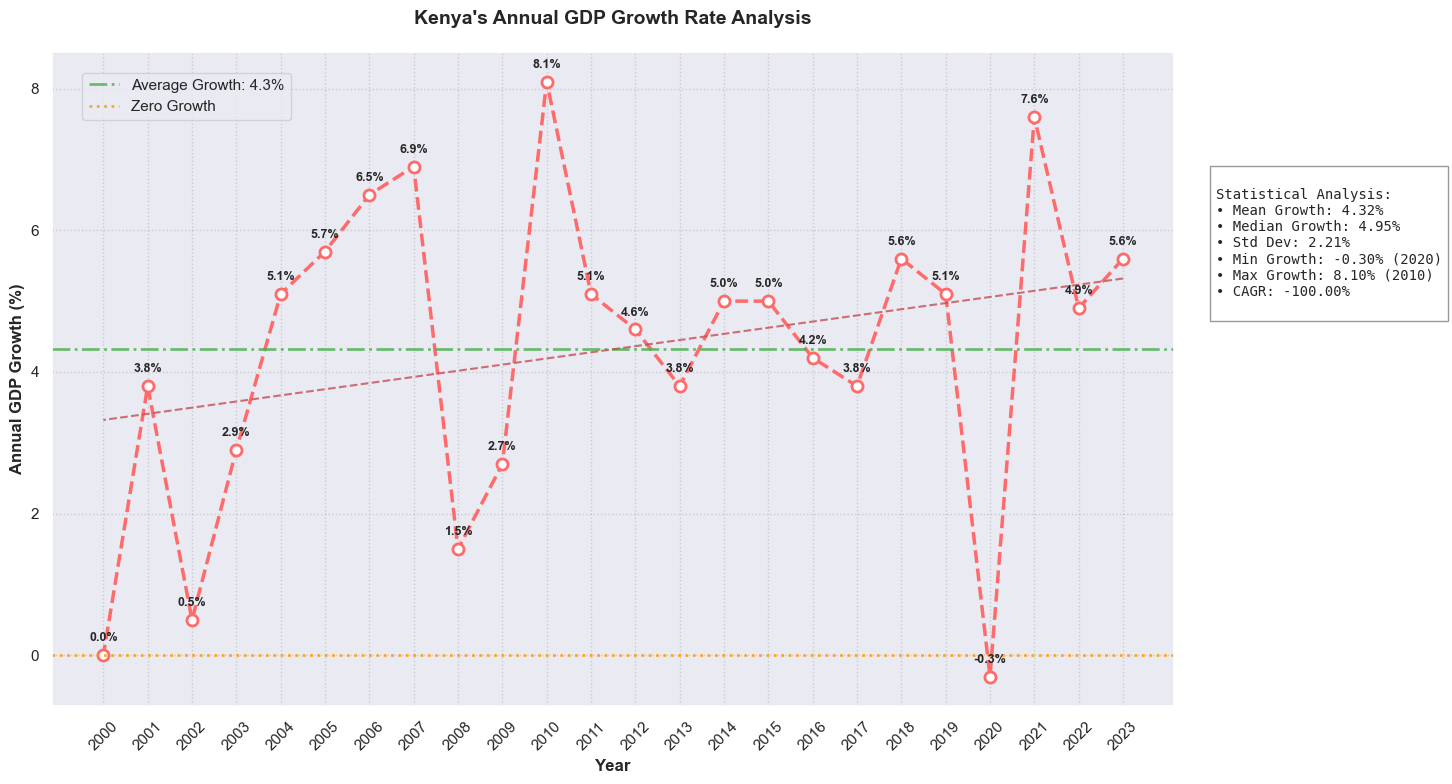


Detailed Statistical Analysis:
count    24.000000
mean      4.320833
std       2.214768
min      -0.300000
25%       3.575000
50%       4.950000
75%       5.600000
max       8.100000
Name: Annual GDP growth (%), dtype: float64

Growth Rate Analysis:
Skewness: -0.569
Kurtosis: -0.192

Year-over-Year Change Analysis:
count    23.000000
mean     -0.243478
std       3.092928
min      -7.900000
25%      -1.500000
50%      -0.400000
75%       0.800000
max       5.400000
Name: Annual GDP growth (%), dtype: float64

Significant Changes (Beyond 1 Std Dev):
Year 2020: -0.30% (Change: -7.90%)
Year 2019: 5.10% (Change: 5.40%)
Year 2009: 2.70% (Change: -5.40%)
Year 2007: 6.90% (Change: 5.40%)
Year 2001: 3.80% (Change: 3.30%)
Year 2000: 0.00% (Change: -3.80%)


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set style
sns.set_theme()  # Use Seaborn's default theme
sns.set_palette("husl")  # Set color palette

# Create figure with new size
plt.figure(figsize=(12, 8))

# Plot GDP Growth Rate with enhanced styling
growth_line = plt.plot(gdp_data['Year'], gdp_data['Annual GDP growth (%)'], 
                      color='#FF6B6B',  # Coral color
                      linestyle='--',    # Dashed line
                      linewidth=2.5,     # Thicker line
                      marker='o',        # Circle markers
                      markersize=8,      # Larger markers
                      markerfacecolor='white',  # White fill
                      markeredgecolor='#FF6B6B',  # Coral edge
                      markeredgewidth=2)  # Marker edge thickness

# Add data labels.
for x, y in zip(gdp_data['Year'], gdp_data['Annual GDP growth (%)']):
    plt.annotate(f'{y:.1f}%', 
                (x, y),
                textcoords="offset points", 
                xytext=(0,10),   # 10 points vertical offset
                ha='center',     # Horizontal alignment
                fontsize=9,      # Font size
                fontweight='bold')

# Customize grid
plt.grid(True, linestyle=':', color='gray', alpha=0.3)

# Add reference lines
avg_growth = gdp_data['Annual GDP growth (%)'].mean()
plt.axhline(y=avg_growth, color='#4CAF50', linestyle='-.', alpha=0.8, 
            linewidth=2, label=f'Average Growth: {avg_growth:.1f}%')
plt.axhline(y=0, color='#FF9800', linestyle=':', alpha=0.8, 
            linewidth=2, label='Zero Growth')

# Customize axes.
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Annual GDP Growth (%)', fontsize=12, fontweight='bold')
plt.title('Kenya\'s Annual GDP Growth Rate Analysis', 
          fontsize=14, fontweight='bold', pad=20)

# Rotate x-axis labels
plt.xticks(gdp_data['Year'], rotation=45)

# Add legend with custom position
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))

# Calculate and add statistical annotations
stats_text = f"""
Statistical Analysis:
• Mean Growth: {gdp_data['Annual GDP growth (%)'].mean():.2f}%
• Median Growth: {gdp_data['Annual GDP growth (%)'].median():.2f}%
• Std Dev: {gdp_data['Annual GDP growth (%)'].std():.2f}%
• Min Growth: {gdp_data['Annual GDP growth (%)'].min():.2f}% ({gdp_data.loc[gdp_data['Annual GDP growth (%)'].idxmin(), 'Year']})
• Max Growth: {gdp_data['Annual GDP growth (%)'].max():.2f}% ({gdp_data.loc[gdp_data['Annual GDP growth (%)'].idxmax(), 'Year']})
• CAGR: {(((gdp_data['Annual GDP growth (%)'].iloc[-1] / 
           gdp_data['Annual GDP growth (%)'].iloc[0]) ** 
           (1/len(gdp_data))) - 1) * 100:.2f}%
"""

# Add statistical text box
plt.figtext(1.02, 0.6, stats_text, 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
            fontsize=10, fontfamily='monospace')

# Calculate trend
z = np.polyfit(range(len(gdp_data['Year'])), gdp_data['Annual GDP growth (%)'], 1)
p = np.poly1d(z)
plt.plot(gdp_data['Year'], p(range(len(gdp_data['Year']))), 
         "r--", alpha=0.8, label=f'Trend Line (Slope: {z[0]:.2f})')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Additional statistical analysis printout
print("\nDetailed Statistical Analysis:")
print("=============================")
print(gdp_data['Annual GDP growth (%)'].describe())

# Calculate and print additional metrics
print("\nGrowth Rate Analysis:")
print("====================")
print(f"Skewness: {stats.skew(gdp_data['Annual GDP growth (%)']):.3f}")
print(f"Kurtosis: {stats.kurtosis(gdp_data['Annual GDP growth (%)']):.3f}")

# Calculate year-over-year changes
yoy_changes = gdp_data['Annual GDP growth (%)'].diff()
print("\nYear-over-Year Change Analysis:")
print("==============================")
print(yoy_changes.describe())

# Identify significant changes
threshold = yoy_changes.std()
significant_changes = gdp_data[abs(yoy_changes) > threshold]
print("\nSignificant Changes (Beyond 1 Std Dev):")
print("=====================================")
for year, growth, change in zip(significant_changes['Year'], 
                               significant_changes['Annual GDP growth (%)'],
                               yoy_changes[significant_changes.index]):
    print(f"Year {year}: {growth:.2f}% (Change: {change:.2f}%)")

# Step 1: Create Lagged Features and Moving Averages

In [20]:
# Creating lagged features and moving averages for GDP
# Add lagged features for Nominal and Real GDP, and Annual GDP growth (using the previous year’s values)
gdp_data['Nominal GDP Lagged (Ksh Million)'] = gdp_data['Nominal GDP prices (Ksh Million)'].shift(1)
gdp_data['Real GDP Lagged (Ksh Million)'] = gdp_data['Real GDP prices (Ksh Million)'].shift(1)
gdp_data['GDP Growth Lagged (%)'] = gdp_data['Annual GDP growth (%)'].shift(1)

# Create 3-year moving averages for nominal GDP, real GDP, and annual growth
gdp_data['Nominal GDP 3yr MA'] = gdp_data['Nominal GDP prices (Ksh Million)'].rolling(window=3).mean()
gdp_data['Real GDP 3yr MA'] = gdp_data['Real GDP prices (Ksh Million)'].rolling(window=3).mean()
gdp_data['GDP Growth 3yr MA (%)'] = gdp_data['Annual GDP growth (%)'].rolling(window=3).mean()

# Display the updated dataset to confirm new features
gdp_data.head(10)

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million),Nominal GDP Lagged (Ksh Million),Real GDP Lagged (Ksh Million),GDP Growth Lagged (%),Nominal GDP 3yr MA,Real GDP 3yr MA,GDP Growth 3yr MA (%)
0,2023,15108806.0,5.6,10399980.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,13489642.0,4.9,9852583.0,15108806.0,10399980.0,5.6,NaN,NaN,NaN
2,2021,12027662.0,7.6,9395942.0,13489642.0,9852583.0,4.9,1.354204e+07,9.882835e+06,6.033333
3,2020,10715070.0,-0.3,8733060.0,12027662.0,9395942.0,7.6,1.207746e+07,9.327195e+06,4.066667
4,2019,10237727.0,5.1,8756946.0,10715070.0,8733060.0,-0.3,1.099349e+07,8.961983e+06,4.133333
5,2018,9340307.0,5.6,8330891.0,10237727.0,8756946.0,5.1,1.009770e+07,8.606966e+06,3.466667
6,2017,8483396.0,3.8,7885521.0,9340307.0,8330891.0,5.6,9.353810e+06,8.324453e+06,4.833333
7,2016,7594064.0,4.2,7594064.0,8483396.0,7885521.0,3.8,8.472589e+06,7.936825e+06,4.533333
8,2015,6884317.0,5.0,7287024.0,7594064.0,7594064.0,4.2,7.653926e+06,7.588870e+06,4.333333
9,2014,6003835.0,5.0,6942157.0,6884317.0,7287024.0,5.0,6.827405e+06,7.274415e+06,4.733333


# Setting up the decision tree

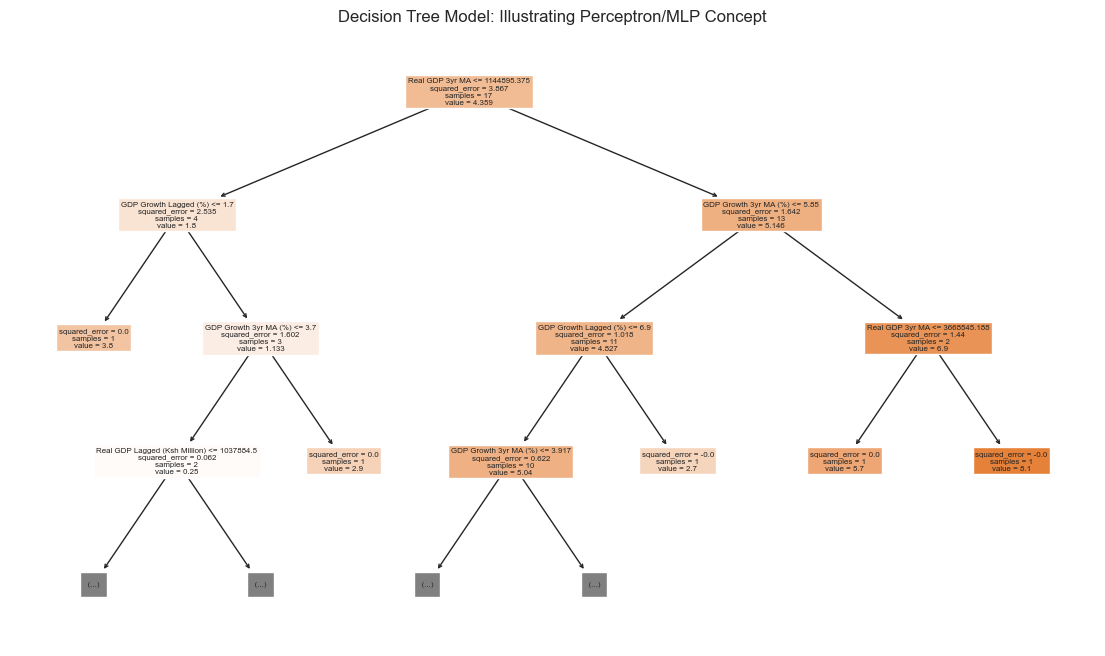

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Selecting features (lagged values and moving averages) and target (current GDP growth)
features = [
    'Nominal GDP Lagged (Ksh Million)', 'Real GDP Lagged (Ksh Million)', 'GDP Growth Lagged (%)',
    'Nominal GDP 3yr MA', 'Real GDP 3yr MA', 'GDP Growth 3yr MA (%)'
]
target = 'Annual GDP growth (%)'

# Drop rows with NaN values (from lagging and rolling calculations) to ensure clean data for training
gdp_data_cleaned = gdp_data.dropna()

# Splitting the data into training and testing sets
X = gdp_data_cleaned[features]
y = gdp_data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Visualize the decision tree to illustrate the concept
plt.figure(figsize=(14, 8))
plot_tree(decision_tree, feature_names=features, filled=True, max_depth=3)
plt.title("Decision Tree Model: Illustrating Perceptron/MLP Concept")
plt.show()

# Setting Up the RNN

In [26]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Select the target (Annual GDP growth) and features related to GDP
# Using 3 years of historical data (lagged and moving average) for the RNN
sequence_length = 3  # Number of past years to look back for each prediction

# Prepare data for RNN
# We need to reshape the data to create sequences of features for each year
sequences = []
targets = []

for i in range(len(gdp_data_cleaned) - sequence_length):
    sequences.append(gdp_data_cleaned[features].iloc[i:i + sequence_length].values)
    targets.append(gdp_data_cleaned[target].iloc[i + sequence_length])

# Convert lists to numpy arrays
X_rnn = np.array(sequences)
y_rnn = np.array(targets)

# Split the reshaped data into training and testing sets
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)

# Define and build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, len(features))))
model.add(Dense(1))  # Output layer for regression

# Compile the RNN model
model.compile(optimizer='adam', loss='mse')

# Display the model summary to understand its structure
model.summary()

C:\Users\ivy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,901 (11.33 KB)

 Trainable params: 2,901 (11.33 KB)

 Non-trainable params: 0 (0.00 B)

# Showing the ReLU function

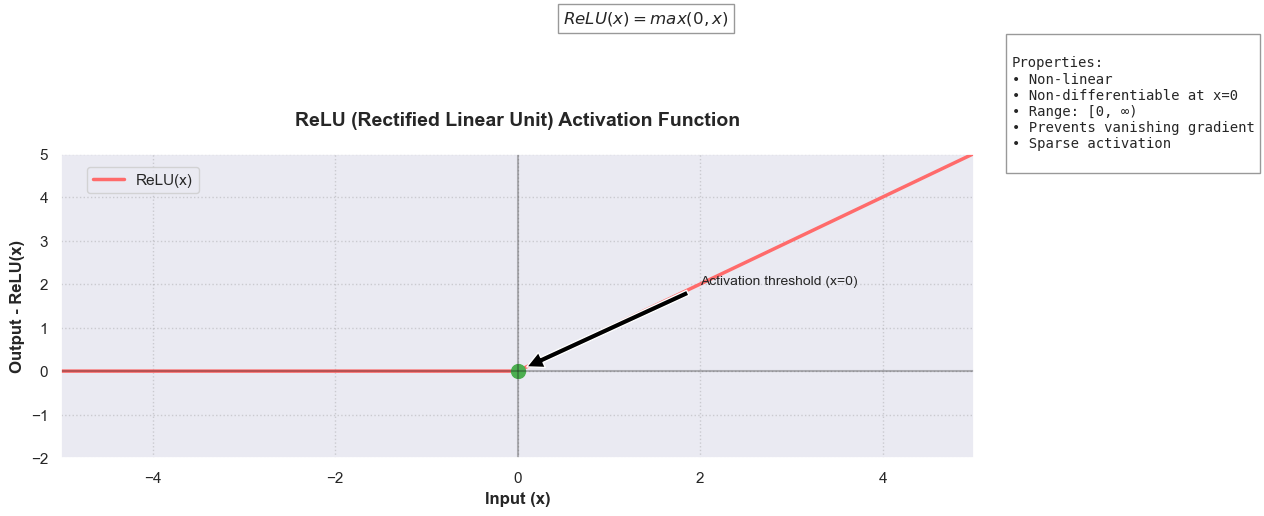


ReLU Function Properties:

Sample points:
ReLU(-5) = 0
ReLU(-2) = 0
ReLU(0) = 0
ReLU(2) = 2
ReLU(5) = 5

Derivative at sample points:
ReLU'(-5) = 0
ReLU'(-2) = 0
ReLU'(0) = undefined (non-differentiable point)
ReLU'(2) = 1
ReLU'(5) = 1


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style using Seaborn
sns.set_theme()  # Use Seaborn's default styling
sns.set_palette("husl")  # Set color palette

def relu(x):
    return np.maximum(0, x)

# Create figure with custom size
plt.figure(figsize=(10, 6))

# Generate x values
x = np.linspace(-10, 10, 200)  # Increased points for smoother line

# Calculate y values using the ReLU function
y = relu(x)

# Plot ReLU function with enhanced styling
plt.plot(x, y, 
         label='ReLU(x)',
         color='#FF6B6B',  # Coral color
         linewidth=2.5,    # Thicker line
         linestyle='-')    # Solid line

# Add the formula annotation
plt.text(0.5, 8, r'$ReLU(x) = max(0, x)$', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Add point annotation at the "elbow"
plt.plot([0], [0], 'o', color='#4CAF50', markersize=10)
plt.annotate('Activation threshold (x=0)',
            xy=(0, 0),
            xytext=(2, 2),
            fontsize=10,
            arrowprops=dict(facecolor='black', shrink=0.05))

# Add axes lines
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Customize grid
plt.grid(True, linestyle=':', color='gray', alpha=0.3)

# Customize axes
plt.xlabel('Input (x)', fontsize=12, fontweight='bold')
plt.ylabel('Output - ReLU(x)', fontsize=12, fontweight='bold')
plt.title('ReLU (Rectified Linear Unit) Activation Function', 
          fontsize=14, fontweight='bold', pad=20)

# Add properties text box
props_text = """
Properties:
• Non-linear
• Non-differentiable at x=0
• Range: [0, ∞)
• Prevents vanishing gradient
• Sparse activation
"""
plt.figtext(1.02, 0.6, props_text, 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
            fontsize=10, fontfamily='monospace')

# Set axis limits for better visualization
plt.xlim(-5, 5)
plt.ylim(-2, 5)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print some mathematical properties
print("\nReLU Function Properties:")
print("========================")
test_points = [-5, -2, 0, 2, 5]
print("\nSample points:")
for x_val in test_points:
    print(f"ReLU({x_val}) = {relu(x_val)}")

# Calculate derivative at sample points (excluding x=0)
print("\nDerivative at sample points:")
for x_val in test_points:
    if x_val == 0:
        print("ReLU'(0) = undefined (non-differentiable point)")
    else:
        derivative = 1 if x_val > 0 else 0
        print(f"ReLU'({x_val}) = {derivative}")


## Next Steps
To train the RNN model:

Fit the model on the training data (X_train_rnn and y_train_rnn) for a certain number of epochs, monitoring the model’s loss on the test data (X_test_rnn and y_test_rnn).
Evaluate the Model: After training, you can evaluate the model’s performance on the test set to see how well it predicts future explore next?